In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100, size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100)

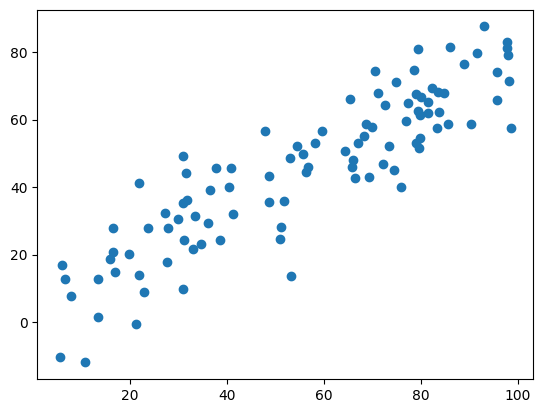

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [5]:
def demean(X):
    return X - np.mean(X, axis=0)

In [6]:
X_demean = demean(X)

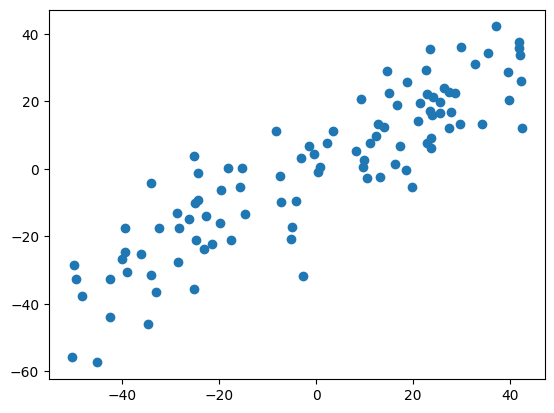

In [7]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.show()

In [11]:
# 笔记中的 f 函数
# X 需要先进行 demean
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

In [26]:
# 推导出的向量化公式
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [21]:
# 用 debug 来当作基准结果
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
        
    return res

In [23]:
# 转换 w 为单位向量
def direction(w):
    return w / np.linalg.norm(w)

#梯度上升法
def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    cur_iter = 0
    w = direction(initial_w)
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        # 这里是加号，这就是梯度上升法与梯度下降法不同的地方
        w = w + eta * gradient
        # 每次求一个单位方向
        w = direction(w)
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1
        
    return w

In [17]:
# 注意不能初始为 0向量
initial_w = np.random.random(X.shape[1])
eta = 0.001

In [24]:
# 标准化数据，注意这里不能用StandarScaler，不使标准差为1
# 这里先看看基准值，以便对比优化过的方案
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.77517212, 0.6317501 ])

In [27]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([0.77517212, 0.6317501 ])

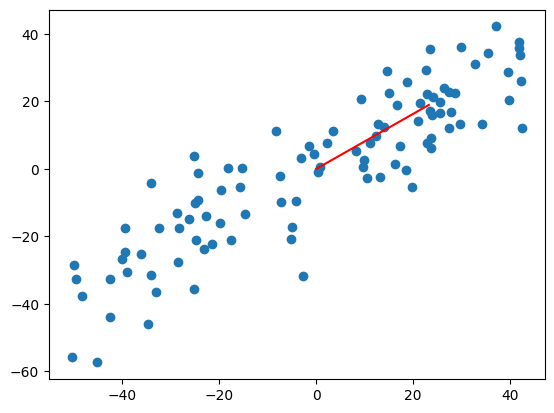

In [40]:
# visualize the data
# 这个轴是我们求出来的第一个主成分，叫第一主成分
w = gradient_ascent(df_math, X_demean, initial_w, eta)

plt.scatter(X_demean[:, 0], X_demean[:, 1])
# 乘于30是为了放大数据，它本身很小
plt.plot([0, w[0]*30], [0, w[1]*30], color='r')
plt.show()

In [34]:
# 极端数据，即不加上 random 噪音
X2 = np.empty((100, 2))
X2[:, 0] = np.random.uniform(0., 100, size=100)
X2[:, 1] = 0.75 * X2[:, 0] + 3.

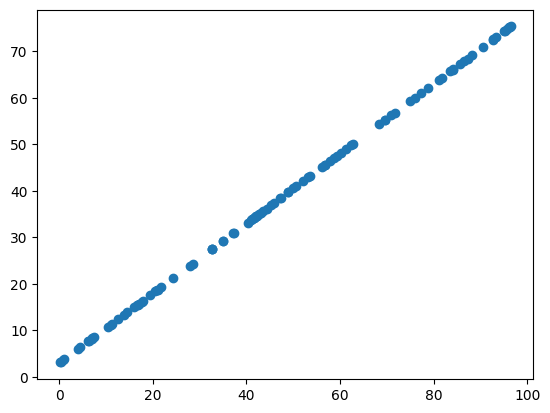

In [35]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [37]:
X2_demean = demean(X2)
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)

[0.79999964 0.60000049]


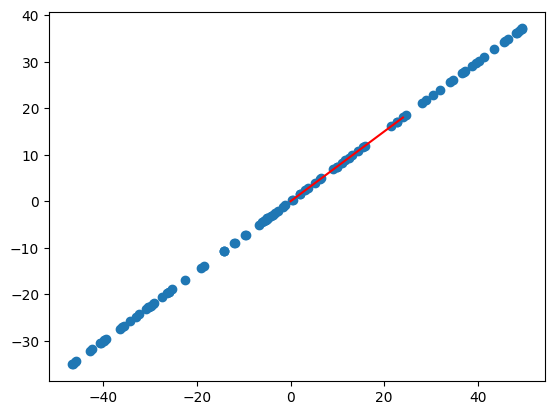

In [39]:
plt.scatter(X2_demean[:, 0], X2_demean[:, 1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color='r')
plt.show()